In [4]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv("/content/drive/MyDrive/heart disease/heart-disease.csv")

In [6]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
X=data.drop("target",axis=1)
y=data["target"]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100,n_jobs=-1)
model.fit(X_train,y_train)

LogisticRegression(n_jobs=-1)

In [10]:
y_pred=model.predict(X_test)


In [11]:
accuracy_score(y_test,y_pred)

0.881578947368421

In [12]:
import joblib
joblib.dump(model,"heart_disease_prediction.pkl")

['heart_disease_prediction.pkl']

In [ ]:
# giving input to the model and checkign its prediction

In [31]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# Example data for one row
row_values = [68 ,	1 ,	0 ,	144 ,	193 ,	1 ,	1 ,	141 ,	0 ,	3.4 ,	1 ,	2 ,	3 	]

# Create a dictionary for this row
row_data = dict(zip(columns, row_values))

# Print the row data
print("Row data:", row_data)


Row data: {'age': 68, 'sex': 1, 'cp': 0, 'trestbps': 144, 'chol': 193, 'fbs': 1, 'restecg': 1, 'thalach': 141, 'exang': 0, 'oldpeak': 3.4, 'slope': 1, 'ca': 2, 'thal': 3}


In [32]:
input_data = np.array(row_values).reshape(1, -1)

In [33]:
model.predict(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [17]:
cm=confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'confusion matrix')

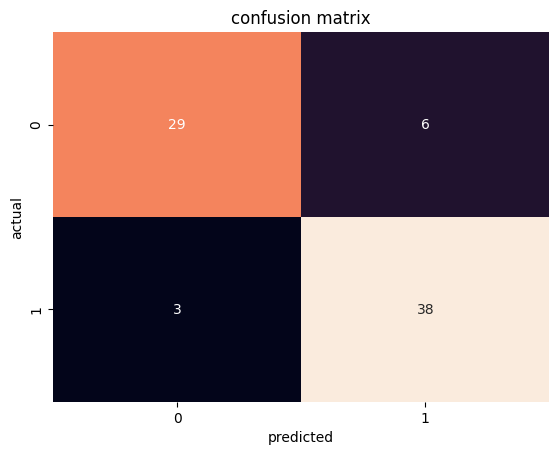

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(cm,annot=True, fmt='d',cbar=False)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")

In [34]:
# finals results

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report,roc_auc_score,log_loss,roc_curve

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)




Precision: 0.8832610645933014
Recall: 0.881578947368421
F1 Score: 0.8810175130539255
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

ROC-AUC Score: 0.8777003484320557
Log Loss: 4.268327375027031
